In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [10]:
results_dir = r'../results'
filenames = os.listdir(results_dir)
print(filenames)
df = pd.read_csv(os.path.join(results_dir, filenames[0]))
df['Log2ArraySize'] = np.log2(df['ArraySize'])
df

['results.csv']


,Num_Threads,Array_Size,Time,Log2ArraySize
0,1,128,19,7.0
1,1,128,18,7.0
2,4,512,20,9.0
3,4,512,19,9.0
4,12,512,7,9.0
5,12,512,7,9.0


In [13]:
grouped = df.groupby(['Threads', 'ArraySize']).agg({
    'Time': ['mean', 'std']
}).reset_index()
grouped['Log2MatrixSize'] = np.log2(grouped['ArraySize'])
grouped['Log2MatrixSize'] = grouped['Log2MatrixSize'].astype(int)
grouped.columns = ['Threads', 'ArraySize', 'MeanTime', 'StdTime', 'Log2MatrixSize']
#grouped = grouped[grouped['Log2MatrixSize'] > 4]
grouped

,Threads,Array_Size,MeanTime,StdTime,Log2MatrixSize
0,1,128,18.5,0.707107,7
1,4,512,19.5,0.707107,9
2,12,512,7.0,0.000000,9


In [8]:
#grouped.to_csv('table.csv')

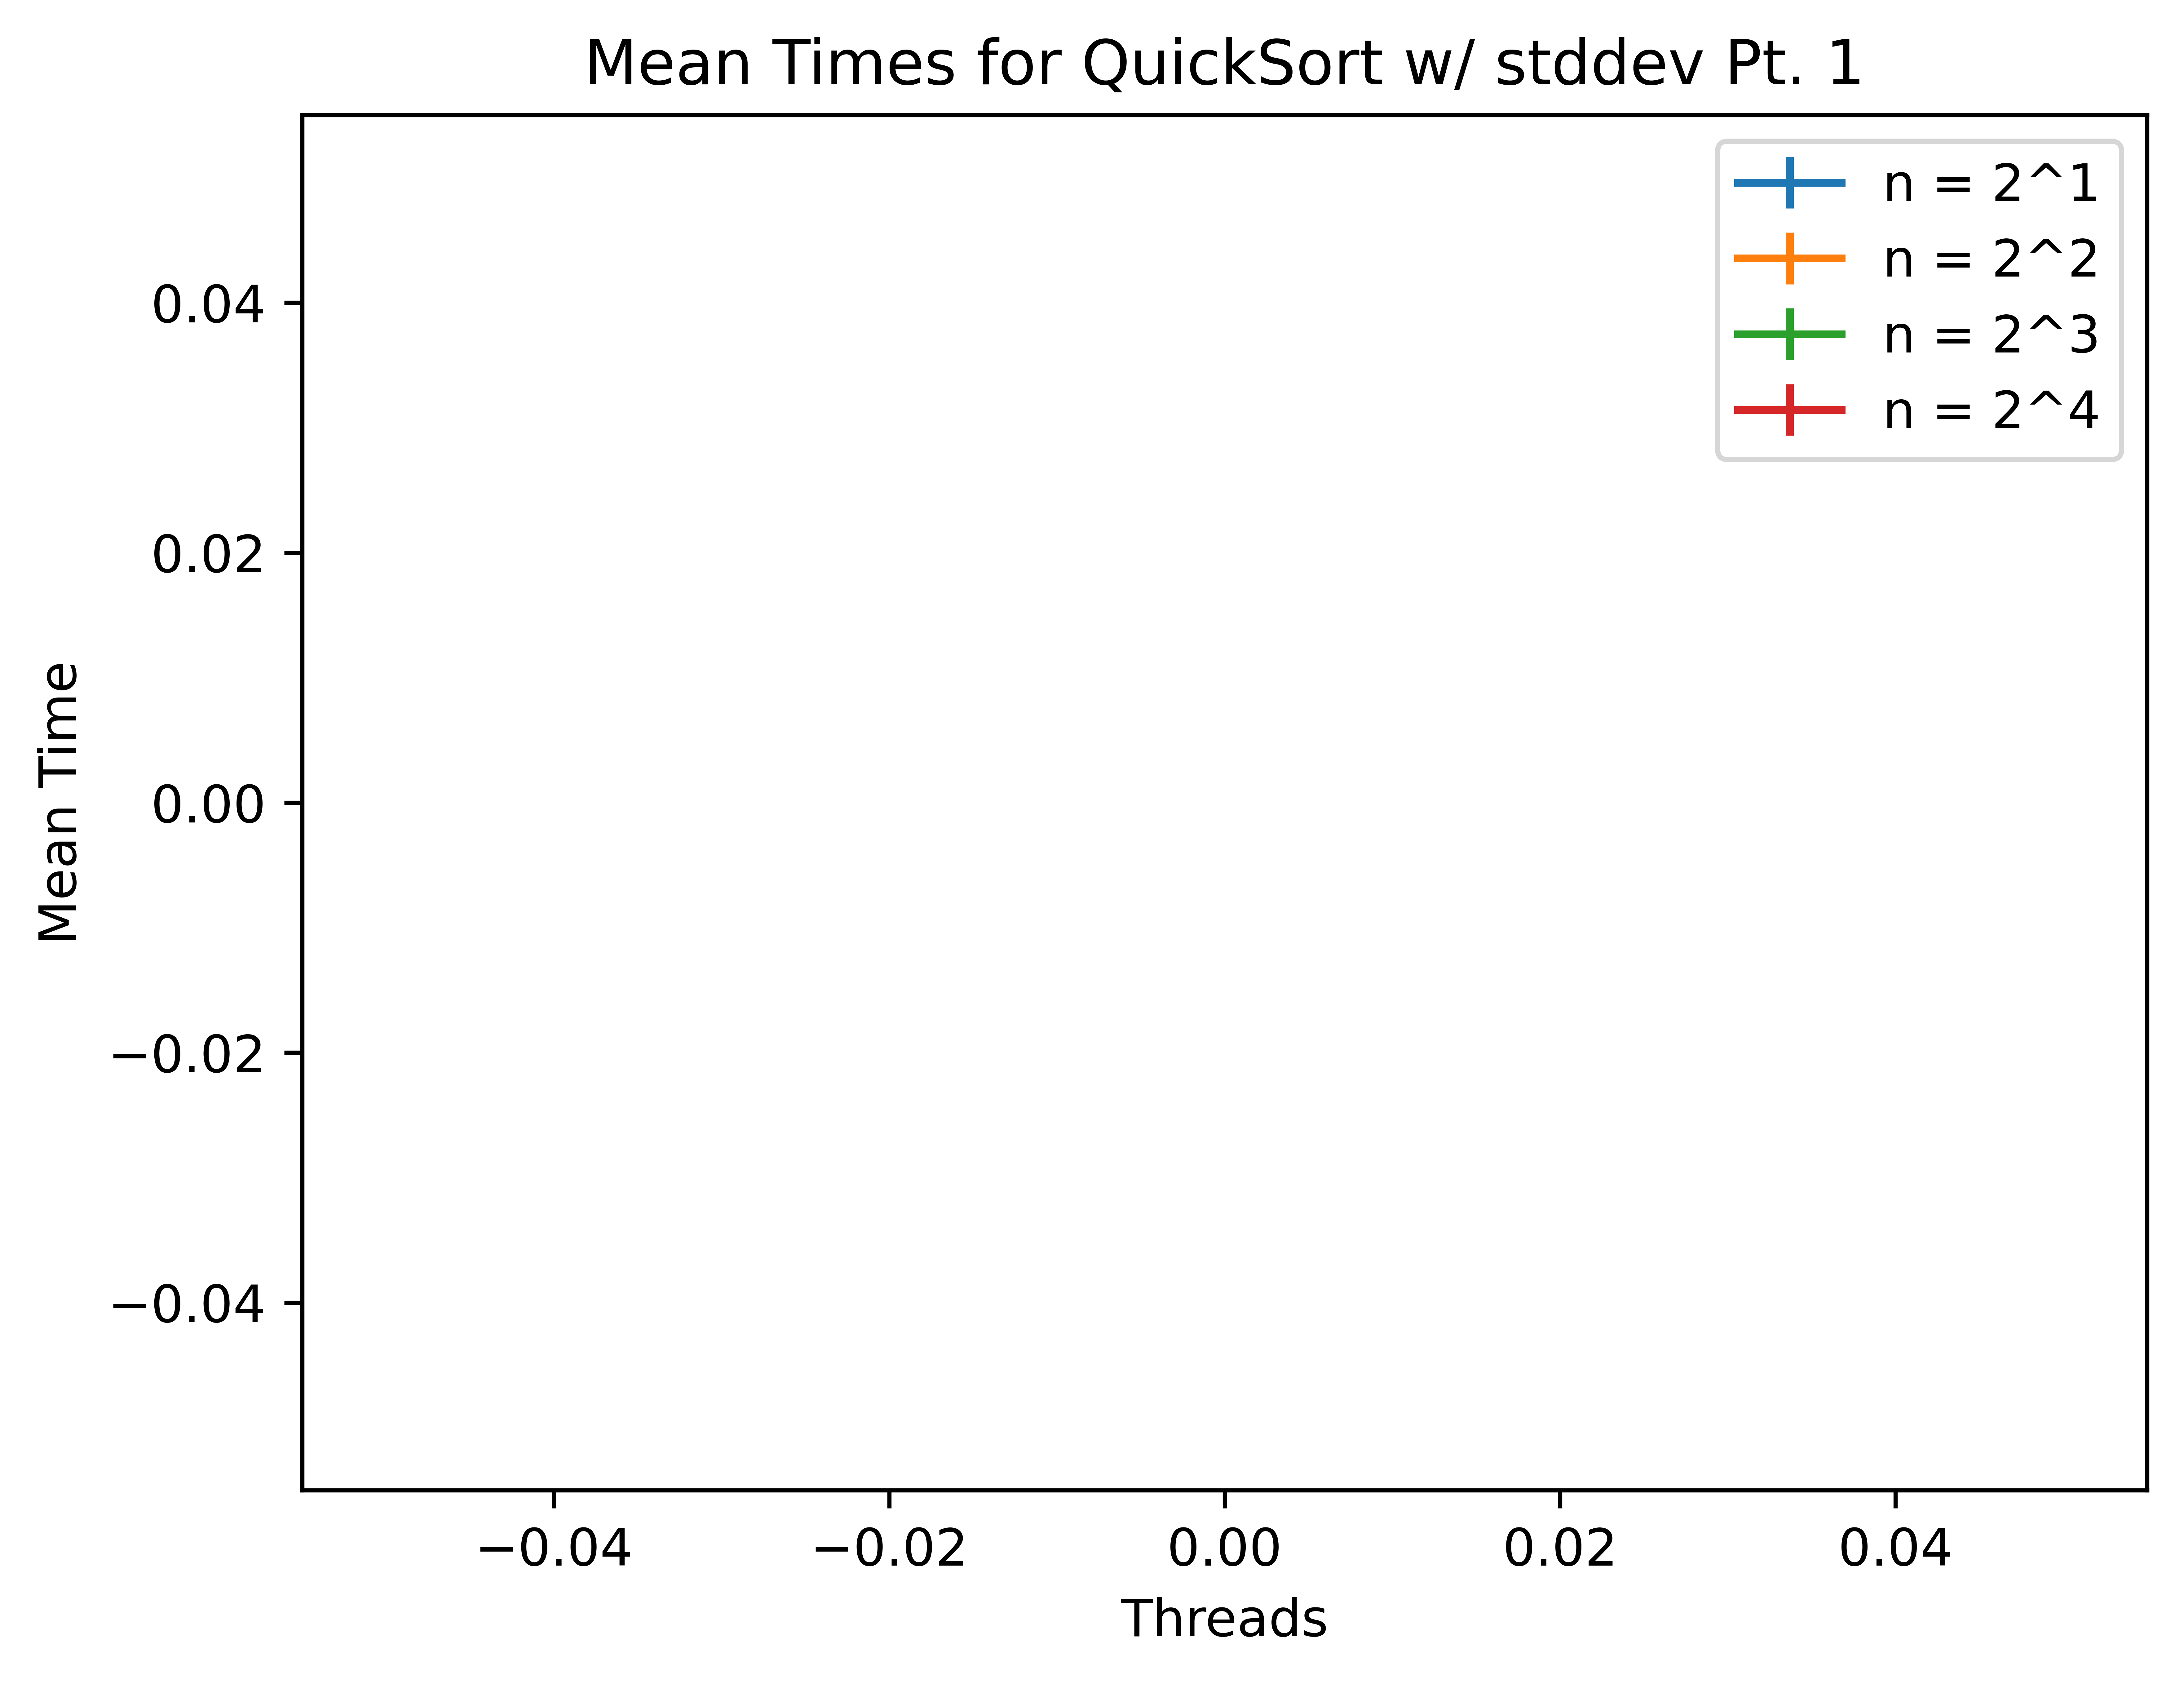

In [14]:
most = max(grouped['Log2MatrixSize'])

plt.figure(dpi=1200)

for i in range(1, most//2 + 1):
    temp = grouped[grouped['Log2MatrixSize'] == i]
    #print(temp)
    plt.errorbar(temp['Threads'], temp['MeanTime'], yerr=temp['StdTime'], label=f"n = 2^{i}")
    plt.xlabel("Threads")
    plt.ylabel("Mean Time")
plt.title(f"Mean Times for QuickSort w/ stddev Pt. 1")
plt.legend(loc='upper right')
#plt.savefig('results1.png')
plt.show()

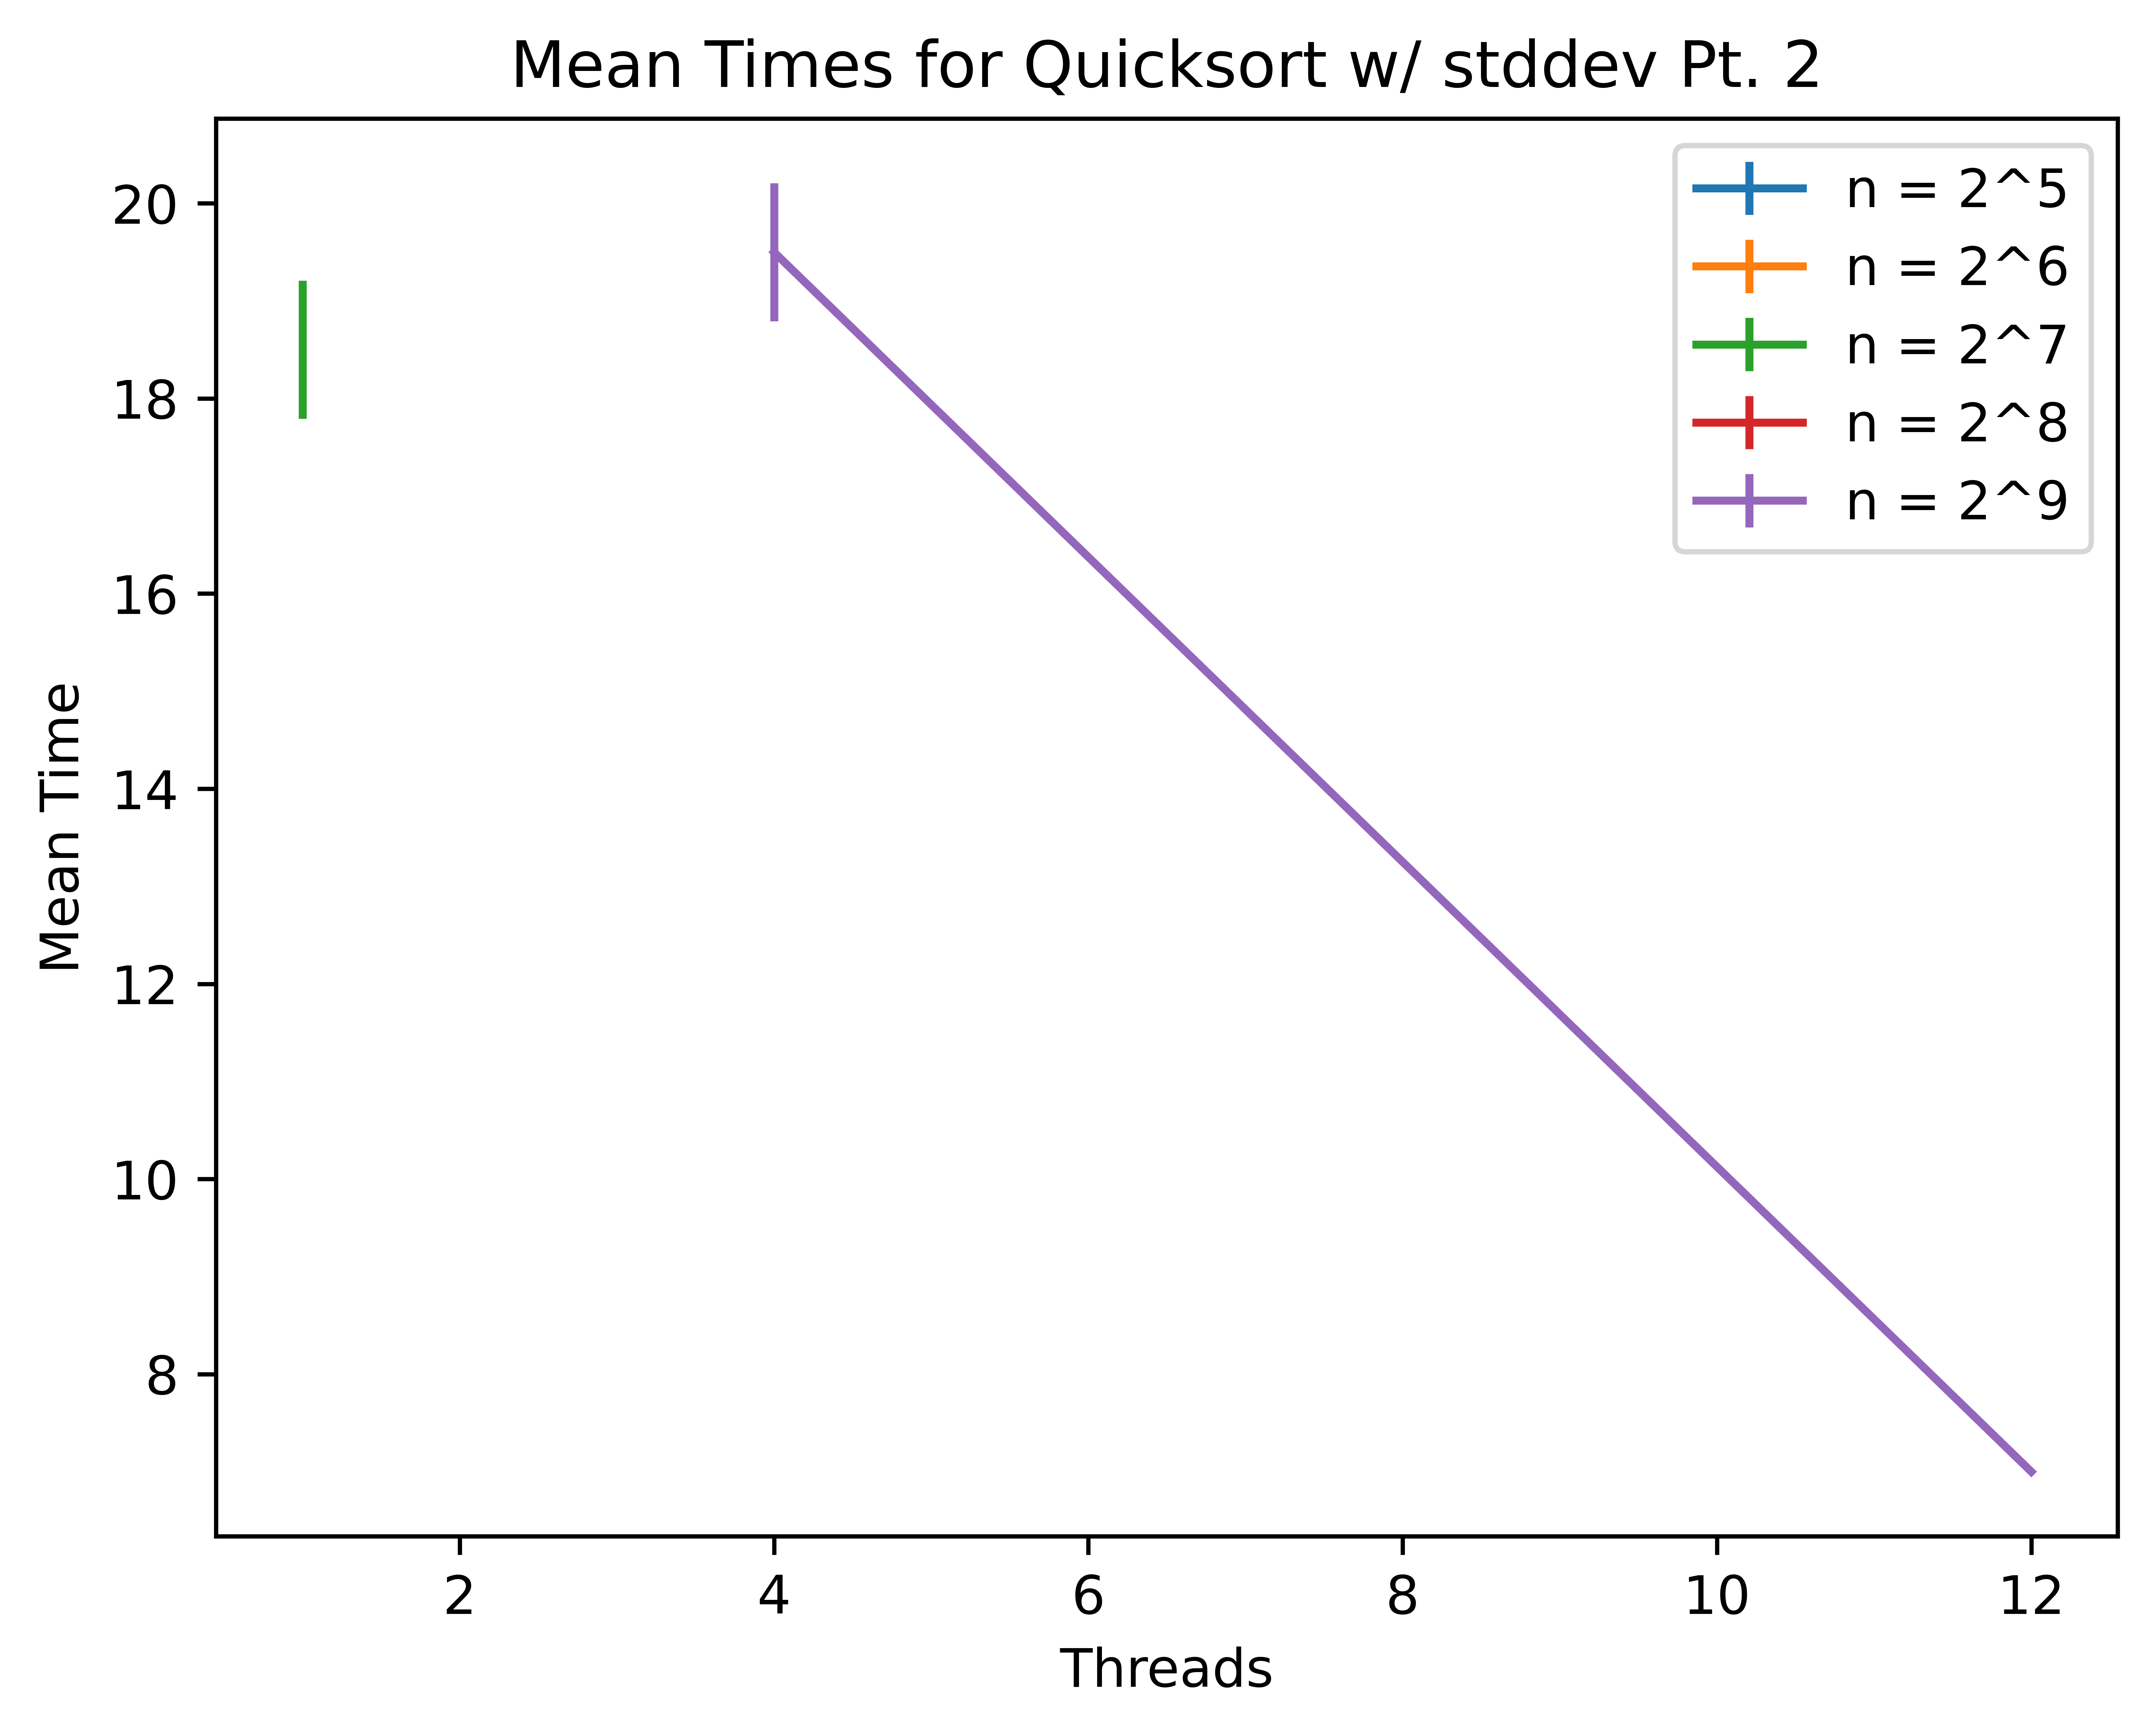

In [15]:
plt.figure(dpi=1200)

for i in range(most//2 + 1, most + 1):
    temp = grouped[grouped['Log2MatrixSize'] == i]
    #print(temp)
    plt.errorbar(temp['Threads'], temp['MeanTime'], yerr=temp['StdTime'], label=f"n = 2^{i}")
    plt.xlabel("Threads")
    plt.ylabel("Mean Time")
plt.title(f"Mean Times for Quicksort w/ stddev Pt. 2")
plt.legend(loc='upper right')
#plt.savefig('results2.png')
plt.show()